**Цель работы:** изучение алгоритмов и методов кластеризации на практике.

# Часть 1

### Создание набора данных
Для создания набора данных использовалась функция make_data, которая создает датафрейм с двумя числовыми столбцами x и y. Np.random.seed(seed): устанавливает зерно для генератора случайных чисел для воспроизводимости данных.

In [1]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],[6, 9], [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df
data=make_data(50, 42)   
data.head() 

,x,y
33,38.845781,1.240865
23,31.505036,2.282322
50,91.692585,4.625246
63,169.264842,4.089659
88,136.270344,4.076603


### Стандартизация данных

Выполнена стандартизация данных с использованием StandardScaler из библиотеки scikit-learn. Метод fit_transform преобразует значения признаков x и y таким образом, чтобы их математическое ожидание было близко к нулю, а стандартное отклонение было единичным.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['x', 'y']] = scaler.fit_transform(data[['x', 'y']])

### Обучение модели для кластеризации методом Kmeans и предсказание

Далее выполнялась кластеризация данных методом k-средних (KMeans) с тремя кластерами. KMeans(n_clusters=3) создает модель k-средних с тремя кластерами.
С помощью метода fit_predict модель была обучена для кластеризации методом kmeans для трёх кластеров. Было выполнено предсказание и получены метки кластеров.

In [3]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, random_state = 42)
labels = k_means.fit_predict(data)


### Визуализация

Создан график, отображающий точки данных. Каждая точка данных в этом графике покрашена в цвет, соответствующий её принадлежности к одному из кластеров. Точки, обозначающие центроиды, отмечены красными плюсиками, они представляют собой средние значения по каждому признаку в кластерах.k_means.cluster_centers_ извлекает значения координат x и y каждого центра кластера.

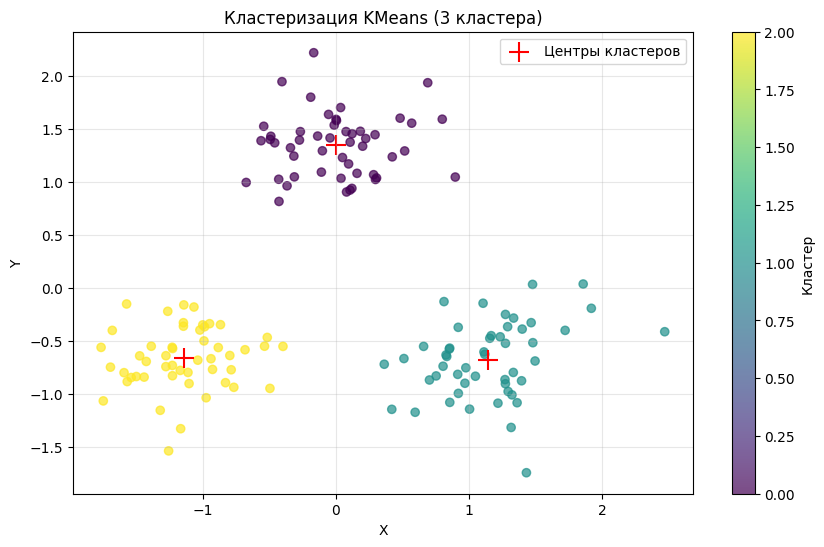

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['x'], data['y'], c=labels, cmap='viridis', alpha=0.7)

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=200, label='Центры кластеров')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Кластеризация KMeans (3 кластера)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Данный график помогает визуально представить распределение данных в кластерах и местоположение центроидов относительно этих точек. По выведенному графику видно, что есть три кластера, отдаленных друг от друга.

### Коэффициент силуэта 

Посчитан общий коэффициент силуэта, который показывает, насколько
похож объект на другие объекты своего кластера.

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette = silhouette_score(data, labels)
print(f"Общий коэффициент силуэта: {silhouette}")

Общий коэффициент силуэта: 0.7242054688229007


Коэффициент силуэта измеряет насколько объект хорошо согласуется с кластером, к которому он был отнесен по сравнению с другими кластерами. В данном случае Коэффициент силуэта равен 0.72, что в целом является довольно хорошим результатом.Так как значение ближе к 1 указывает на более компактные и отделенные друг от друга кластеры, значит объекты в одном кластере похожи между собой,а объекты в разных кластерах значительно различаются. Кластеры имеют хорошее разделение и объекты внутри них хорошо согласованы с соответствующими кластерами.

### Два кластера

Аналогичным образом произведена кластеризация данных методом k-средних с двумя кластерами

In [6]:
k2_means = KMeans(n_clusters = 2, random_state = 42)
labels_2 = k2_means.fit_predict(data)


Далее выполнена визуализация кластеризации данных, с количество класетров равным 2.

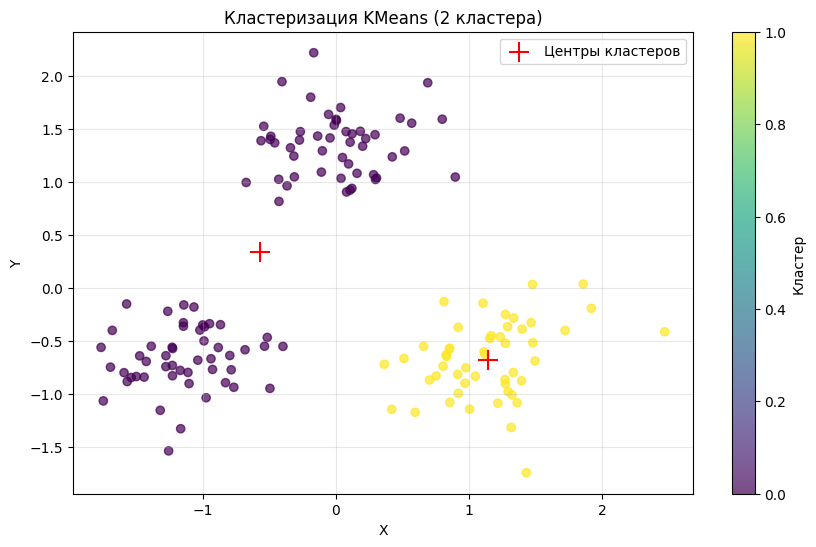

In [7]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['x'], data['y'], c=labels_2, cmap='viridis', alpha=0.7)

centers = k2_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=200, label='Центры кластеров')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Кластеризация KMeans (2 кластера)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Из графиков можно заметить, что данные одного из кластеров имеют большой разброс, что свидетельствует о неверном выборе числа кластеров для кластеризации. Коэффициент силуэта, равный 0.49, указывает на то, что кластеры в данных не столь однородны или разделены

In [8]:
silhouette = silhouette_score(data, labels_2)
print(f"Общий коэффициент силуэта: {silhouette}")

Общий коэффициент силуэта: 0.48623779282135215


### Четыре кластера

Аналогичным образом произведена кластеризация и визуализация данных методом k-средних с четырьмя кластерами

In [9]:
k4_means = KMeans(n_clusters = 4, random_state = 42)
labels_4 = k4_means.fit_predict(data)


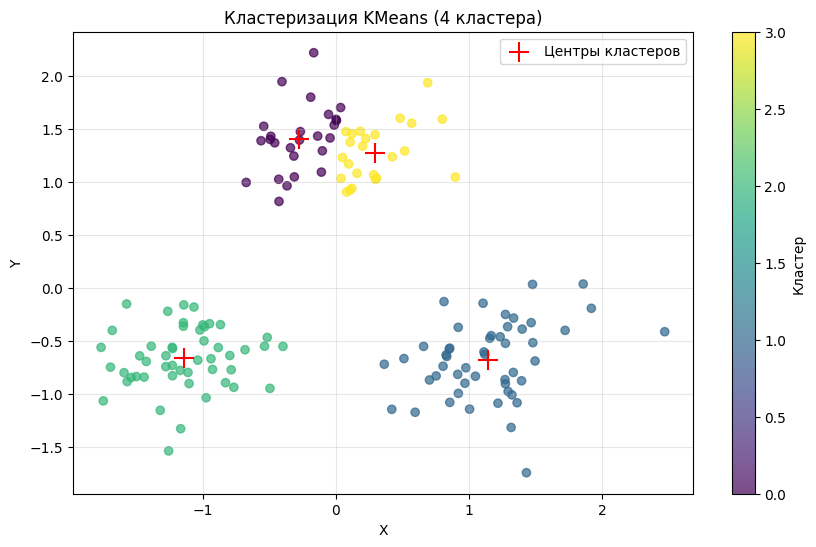

In [10]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['x'], data['y'], c=labels_4, cmap='viridis', alpha=0.7)

centers = k4_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+', s=200, label='Центры кластеров')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Кластеризация KMeans (4 кластера)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

График показывает, что два кластера соприкасаются, это может быть признаком, что данные имеют сложную структуру и границы между кластерами не являются четкими. Объекты обладают признаками, которые схожи с одной и с другой группой, что затрудняет четкое и однозначное определение кластера, к которму они относятся.

In [11]:
silhouette = silhouette_score(data, labels_4)
print(f"Общий коэффициент силуэта: {silhouette}")

Общий коэффициент силуэта: 0.5880815199446503


Можно сделать вывод, что оптимальное количество кластеров - это 3, что соответствует исходной структуре данных.

### Метод локтя

Далее построен график по методу локтя, суть метода
заключается в том, чтобы найти точку на графике, где изменение суммы квадратов
расстояний между точками и центроидами кластеров перестает значительно
меняться.


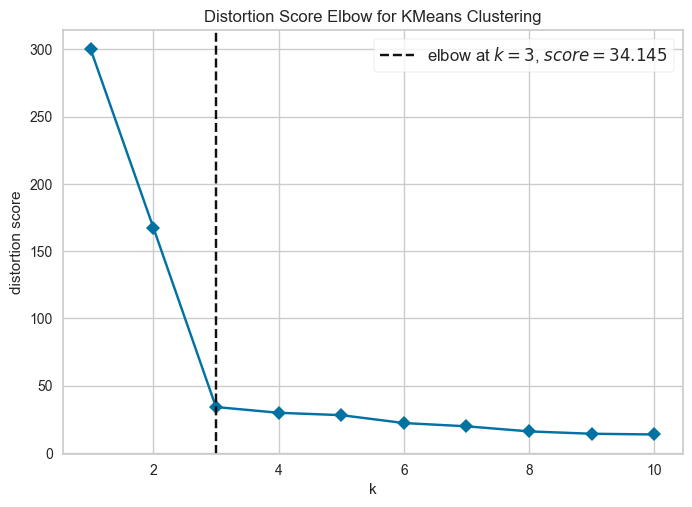

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(data)
visualizer.show()

**Вывод**: 
Проведенная кластеризация методом K-means показала, что оптимальное количество кластеров для данных равно 3. Это подтверждается:

Методом локтя - пунктирная линия указывает на k=3 как оптимальное значение

Коэффициентом силуэта - максимальное значение 0.724 достигается при n_clusters=3

Визуализацией - кластеры хорошо разделены и соответствуют исходной структуре данных

# Часть 2

**Вариант 1** 
Набор данных - medical_diagnosis.csv
Данные содержат информацию о болезнях.

age — возраст пациента (лет), числовой.

sex — пол: Male / Female, категориальный.

BMI — индекс массы тела (кг/м²), числовой.

systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.

cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.

fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.

smoking_status — статус курения: Never / Former / Current, категориальный.

family_history — наследственность по заболеванию: Yes / No, категориальный.

activity_level — уровень физической активности: Low / Moderate / High, категориальный.

symptom_score — суммарная выраженность симптомов (0–10), числовой.

CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.

WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.

ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.

Disease — целевой класс: 1 — болеет, 0 — не болеет.


Был загружен датасет и выведены первые 20 строк

In [13]:
df = pd.read_csv("medical_diagnosis.csv")
df.head(20)


,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0
5,43,Male,13.5,136.0,171.0,91.0,Never,No,Low,1.3,0.10,5.05,ST-T abnormality,0
6,76,Female,26.2,110.0,269.0,140.0,Current,Yes,Moderate,2.7,2.92,7.91,ST-T abnormality,0
7,24,Female,30.0,162.0,189.0,112.0,Never,Yes,High,2.1,0.80,7.71,LVH,0
8,83,Male,25.7,107.0,215.0,110.0,Never,No,Moderate,2.7,2.60,9.17,Normal,0
9,41,Female,21.5,156.0,188.0,120.0,Never,No,High,1.1,0.10,10.15,Normal,0


Произведена предварительная обработка данных. Для оценки данных использовался метод info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

Затем произведено удаление явных дубликатов

In [15]:
df[df.duplicated()]

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
3024,49,Female,27.5,133.0,438.6,91.0,Former,No,Moderate,1.9,25.04,12.61,Normal,0


In [16]:
df = df.drop_duplicates().reset_index(drop=True)

Для поиска неявных дубликатов применятся метод unique, который выводит уникальные значения.

In [17]:
for x in df.columns:
  print (x, ":", "\n", df[x].unique(),"\n" )

age : 
 [34 24 19 89 66 43 76 83 41 87 30 80 50 86 84 26 18 38 58 55 69 63 60 21
 32 56 74 45 39 67 78 49 81 68 28 33 47 88 44 52 46 27 79 64 54 62 82 36
 73 85 65 61 77 57 22 75 35 20 53 29 70 23 31 42 37 25 72 59 71 51 40 48] 

sex : 
 ['Male' 'Female'] 

BMI : 
 [16.8 29.2 16.5 15.4 16.7 13.5 26.2 30.  25.7 21.5 36.2 32.8 24.4 29.6
 25.6 19.6 27.6 15.1 30.1 33.  31.  24.2 29.1 33.8 26.4 20.  20.4 17.2
 25.3 20.5 20.8 18.  22.  35.2 17.7 30.6 35.  23.8 33.9 23.5 25.8 31.8
 19.5 23.4 31.5 25.5 21.2 25.  37.6 29.5 23.  40.4 39.1 26.9 22.7 32.1
 22.3 23.7 29.4 30.3 29.8 26.6 33.1 30.7 29.7 24.3 31.3 34.3 28.9 27.8
 21.4 29.3 30.5 28.6 21.3 25.2 28.  34.2 30.8 26.7 25.9 24.9 31.1 31.7
 20.1 35.4 40.6 27.2 19.8 20.6 23.1 35.6 36.  27.3 26.5 39.4 28.3 14.3
 34.9 27.  37.4 18.3 27.1 21.6 24.7 17.1 19.4 21.8 15.  22.4 19.9 20.3
 14.4 27.5 33.3 22.9 23.9 14.6 24.  18.7 42.2 23.6 22.2 30.2 40.9 28.1
 28.2 28.5 32.6 28.7 16.2 24.8 37.2 26.  32.  29.  21.  23.2 14.5 30.9
 17.9 31.4 18.1 32.3 35.

Целевой переменной выбран столбец Disease, который показывает есть ли у пациента болезнь, или нет. Построена матрица диаграмм рассеяния по некоторым количественнным стобцам

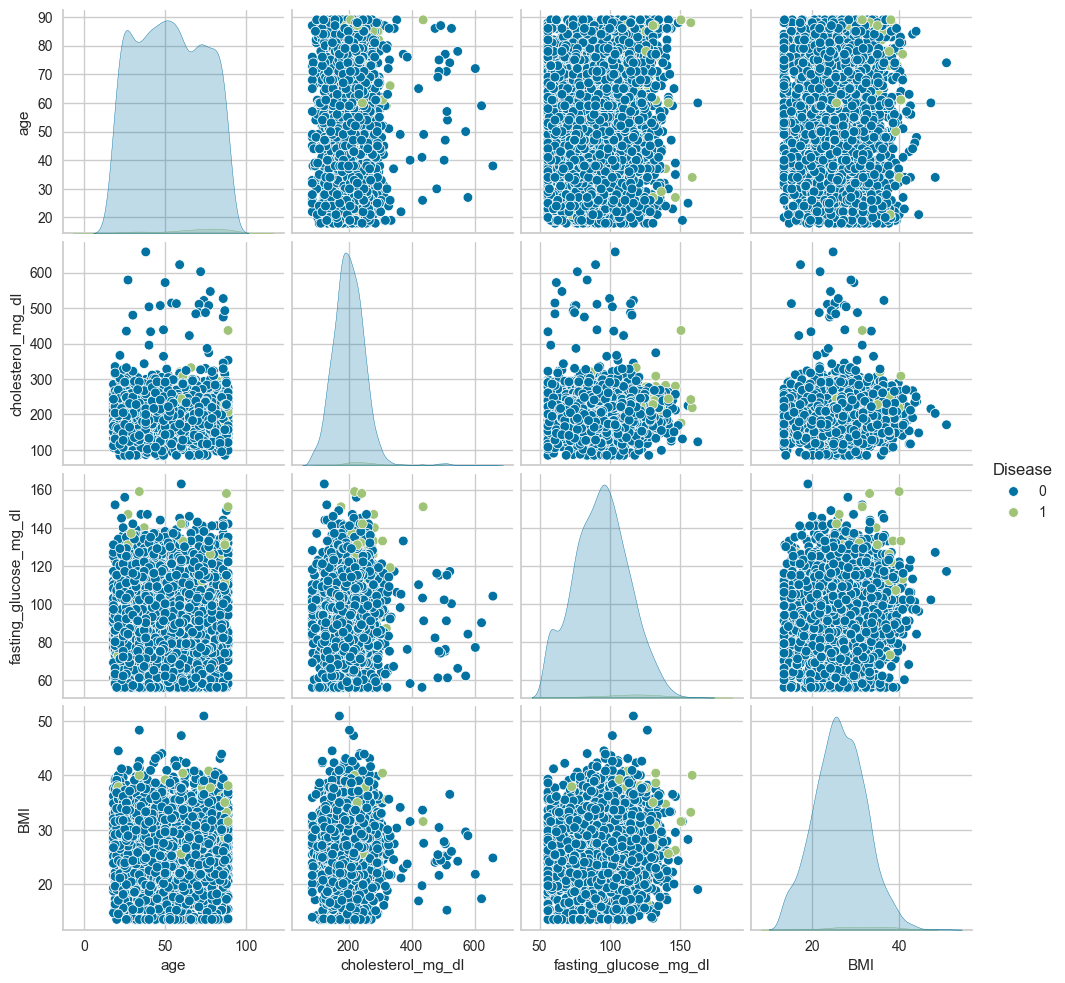

In [18]:
import seaborn as sns
sns.pairplot(df[['age','cholesterol_mg_dl','fasting_glucose_mg_dl','BMI', 'Disease']], hue='Disease')

Была удалена целевая переменная Disease, проведено кодирование категориальных признаков, проведена стандартизация числовых признаков. 

In [19]:
categorical_columns = ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


df_for_clustering = df_encoded.drop('Disease', axis=1)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_for_clustering)
scaled_df = pd.DataFrame(scaled_df, columns=df_for_clustering.columns)

В результате получен полностью числовой и стандартизированный набор данных, готовый для применения алгоритмов кластеризации.

Была выполнена кластеризация объектов методом k-means. Для этого первым шагом перебрали k и сравниили их по коэффициенту силуэта.

In [20]:
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette)
    

# Находим лучшее k
best_k_index = silhouette_scores.index(max(silhouette_scores))
best_k = k_range[best_k_index]
best_silhouette = silhouette_scores[best_k_index]

print(f"Оптимальное k: {best_k}")
print(f"С коэффициентом силуэта: {best_silhouette:.4f}")

Оптимальное k: 2
С коэффициентом силуэта: 0.1665


Сделаем проверку с помощью метода локтя

Алгоритм K-Means обнаружил, что разбить данные на 4 группы математически эффективно с точки зрения минимизации общего расстояния от точек до центроидов их кластеров.
Хотя метод локтя указывает на возможную геометрическую сложность данных при k=4, коэффициент силуэта является максимальным при k=2. Данный результат также является интерпретируемым, так как соответствует разделению пациентов на группы с наличием и отсутствием заболевания, в связи с чем для дальнейшего анализа было выбрано количество кластеров, равное 2.

Выполняется кластеризация для данных на основе двух кластеров и выводится количество элементов, отнесенных к каждому кластеру

In [21]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

df['Cluster'] = cluster_labels

print(df['Cluster'].value_counts())

Cluster
0    2381
1     649
Name: count, dtype: int64


Затем выполняется группировка данных по кластерам и выводятся средние значения для каждого числового столбца

In [22]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df[numeric_columns].groupby('Cluster').mean()
cluster_means

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
Cluster,,,,,,,,,
0,52.808904,26.416884,122.102478,201.873331,94.262915,2.040067,1.370519,6.820811,0.016380
1,54.531587,26.644068,123.557781,205.579045,94.750385,2.040832,1.381248,6.831895,0.015408


Кластер 0 имеет средний возраст пациентов 53 года, относительно хорошее значение индекса массы и уровень холестерина также нормальный. Практически все пациенты в этом кластере имеют средние показатели. В 1 кластере показатели немного отличаются, но по средним показателям нельзя сказать, что пациенты больны.


Был вычислен средний коэффициент силуэта (silhouette score) для кластеризации, выполненной на масштабированных данных. Эта метрика оценивает, насколько хорошо объекты сгруппированы внутри своих кластеров и насколько четко разделены разные кластеры.

In [23]:
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print(f"Средний коэффициент силуэта для кластеризации: {silhouette_avg}")

Средний коэффициент силуэта для кластеризации: 0.16650748002062005


По силуэту можно увидеть, что кластеризация не выявила чётких, хорошо разделённых групп в данных.

Чтобы посчитать внешние метрики, за истинный класс берется целевая переменная true_labels = df['Disease']

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score

# Внешние метрики 
true_labels = df['Disease']

ari = adjusted_rand_score(true_labels, cluster_labels)
ami = adjusted_mutual_info_score(true_labels, cluster_labels)
fmi = fowlkes_mallows_score(true_labels, cluster_labels)
homogeneity = homogeneity_score(true_labels, cluster_labels)
completeness = completeness_score(true_labels, cluster_labels)
v_measure = v_measure_score(true_labels, cluster_labels)

print("Метрики качества кластеризации (K-means k=2):")
print(f"Коэффициент силуэта (Silhouette Score): {silhouette:.4f}")
print(f"Скорректированный индекс Рэнда (ARI): {ari:.4f}")
print(f"Скорректированная взаимная информация (AMI): {ami:.4f}")
print(f"Индекс Фаулкса-Мэллоуса (FMI): {fmi:.4f}")
print(f"Однородность (Homogeneity): {homogeneity:.4f}")
print(f"Полнота (Completeness): {completeness:.4f}")
print(f"V-мера (V-measure): {v_measure:.4f}")

Метрики качества кластеризации (K-means k=2):
Коэффициент силуэта (Silhouette Score): 0.1043
Скорректированный индекс Рэнда (ARI): -0.0011
Скорректированная взаимная информация (AMI): -0.0005
Индекс Фаулкса-Мэллоуса (FMI): 0.8011
Однородность (Homogeneity): 0.0001
Полнота (Completeness): 0.0000
V-мера (V-measure): 0.0000


Кластеризация выявила структуру данных, но эта структура не связана с заболеванием. Полученные кластеры не предсказывают болезнь. Для предсказания Disease нужны другие методы
Кластеризация полезна для общего сегментирования пациентов, но не для медицинской диагностики

Далее была выполнена кластеризация иерархическим агломеративным методом. Иерархическая кластеризация представляет собой процесс иерархического построения дерева кластеров с использованием различных методов объединения или разделения кластеров. В результате получается дерево (дендрограмма), которое позволяет анализировать иерархическую структуру данных и определять кластеры на разных уровнях иерархии.Первым шагом была построена дендрограмма для определения оптимального количества кластеров.

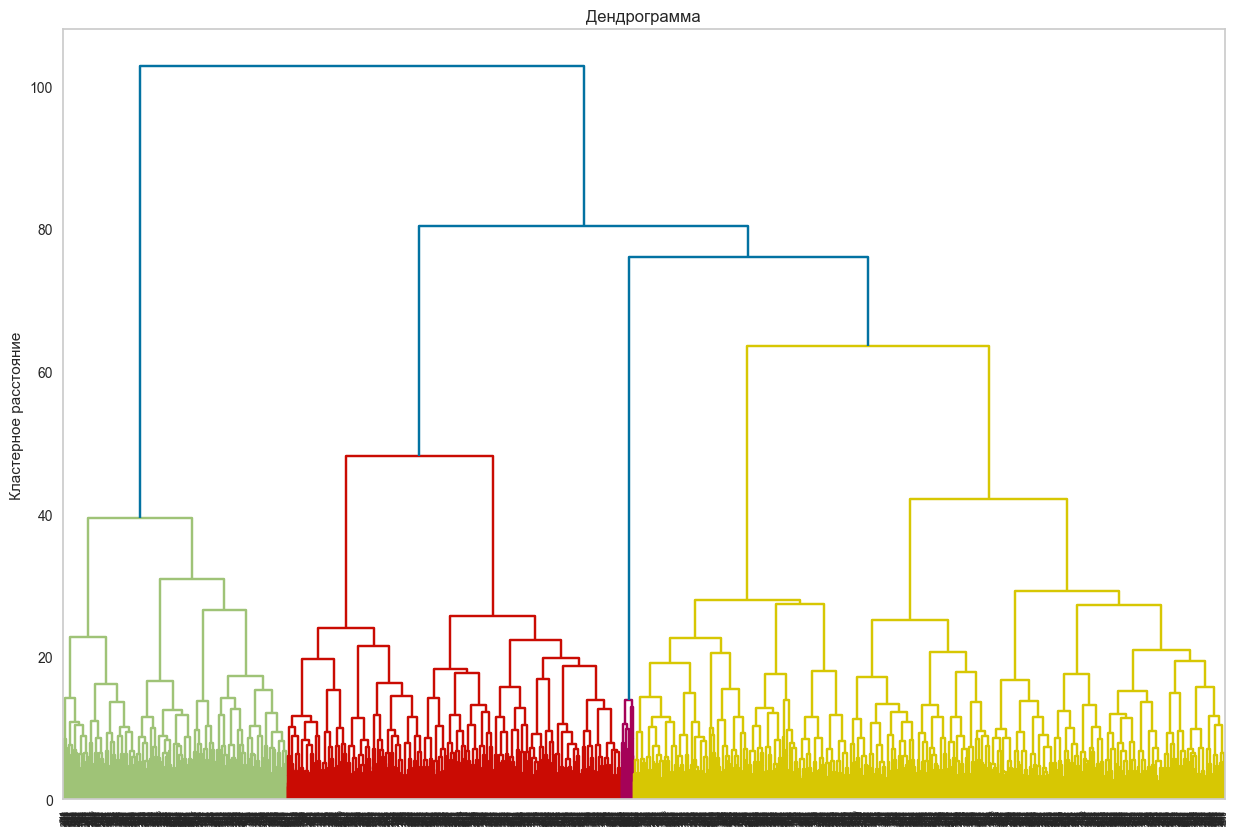

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(scaled_df, method = 'ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.ylabel('Кластерное расстояние')
plt.show()

Для того чтобы получить из такого дерева кластеризацию, мы выбираем уровень. После этого идем от пересечений горизонтальной линии с вертикальными вниз, получая в данном примере четыре кластера. Если мы сделаем разбиение выше или ниже, получим больше или меньше кластеров, более релевантных решаемой задаче бизнеса. По дендрограмме видно, что оптимальное количество k = 2. Выполним кластеризацию.

In [26]:
from sklearn.cluster import AgglomerativeClustering
optimal_k = 2  

hierarchical = AgglomerativeClustering(
    n_clusters=optimal_k,
    metric='euclidean',
    linkage='ward'
)
hierarchical_labels = hierarchical.fit_predict(scaled_df)

In [27]:
print(f"Общее количество кластеров: {optimal_k}")
for i in range(optimal_k):
    count = np.sum(hierarchical_labels == i)
    print(f"Кластер {i}: {count} объектов")

Общее количество кластеров: 2
Кластер 0: 2444 объектов
Кластер 1: 586 объектов


Были подсчитаны средние показатели по каждому числовому признаку каждого кластера.

In [28]:
df['Cluster'] = hierarchical_labels
cluster_means = df.select_dtypes(include=[np.number]).groupby('Cluster').mean()
cluster_means

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
Cluster,,,,,,,,,
0,52.840016,26.400982,122.202946,202.745581,94.227905,2.039321,1.445902,6.832054,0.016776
1,54.587031,26.734812,123.295222,202.339590,94.948805,2.044027,1.068003,6.786195,0.013652


Далее выполняется комплексная оценка качества кластеризации, полученной с помощью иерархического метода, с использованием внешних и внутренних метрик. Истинные метки (true_labels) извлекаются из столбца 'Disease' исходного датасета, что позволяет проверить, насколько кластеризация соответствует реальной медицинской диагностике.

In [29]:
silhouette_med_2 = silhouette_score(scaled_df, hierarchical_labels)
print(f"Общий коэффициент силуэта: {silhouette_med_2}")
true_labels = df['Disease']

ari = adjusted_rand_score(true_labels, hierarchical_labels)
ami = adjusted_mutual_info_score(true_labels, hierarchical_labels)
fmi = fowlkes_mallows_score(true_labels, hierarchical_labels)
homogeneity = homogeneity_score(true_labels, hierarchical_labels)
completeness = completeness_score(true_labels, hierarchical_labels)
v_measure = v_measure_score(true_labels, hierarchical_labels)

print(f"Скорректированный индекс Рэнда (ARI): {ari:.4f}")
print(f"Скорректированная взаимная информация (AMI): {ami:.4f}")
print(f"Индекс Фаулкса-Мэллоуса (FMI): {fmi:.4f}")
print(f"Однородность (Homogeneity): {homogeneity:.4f}")
print(f"Полнота (Completeness): {completeness:.4f}")
print(f"V-мера (V-measure): {v_measure:.4f}")

Общий коэффициент силуэта: 0.16212334847015078
Скорректированный индекс Рэнда (ARI): -0.0036
Скорректированная взаимная информация (AMI): -0.0004
Индекс Фаулкса-Мэллоуса (FMI): 0.8154
Однородность (Homogeneity): 0.0006
Полнота (Completeness): 0.0001
V-мера (V-measure): 0.0002


Силуэт (0.1621) - низкое качество, кластеры слабо разделены. Все внешние метрики (ARI, AMI, Homogeneity, V-measure) ≈ 0 - кластеры не соответствуют заболеванию. Disease FMI (0.8154) - высокий, но это обманчиво из-за дисбаланса размеров кластеров. Кластеризация выявила структуру данных, но эта структура не связана с целевой переменной Disease.

**Вывод:** K-means показал немного лучшее качество:

Силуэт 0.1665 vs 0.1621 - кластеры чуть более разделены

Метрики практически идентичны, разница незначительна. Оба метода показали низкое качество:

Внешние метрики ≈ 0 - кластеры не соответствуют заболеванию Disease,
силуэт < 0.2 - слабое разделение кластеров K-means предпочтительнее из-за простоты и скорости, кластеризация полезна для общего анализа структуры данных, но не для предсказания болезни

# Вывод

В данной лабораторной работе выполнена кластеризация с использованием метода K-Means и иерархически агломеративного метода.

На синтетических данных метод k-means показал отличные результаты, четко выделив три заранее заданные группы. Однако на реальных медицинских данных результаты оказались значительно скромнее.

Оба алгоритма смогли выявить структуру в данных, разделив пациентов на группы с нормальными и аномальными показателями здоровья, но эта группировка не соответствовала целевому признаку наличия заболевания. Метрики качества показали, что кластеры слабо разделены и практически не связаны с диагнозом Disease.

K-means продемонстрировал немного лучшее качество чем иерархический метод, при этом оказался более простым и быстрым в реализации.



# Доп. задания

**6** - Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до
10). Построить график - по оси х - кол-во кластеров, по у - значение метрики
(отразить все 4 метрики на одном графике разным цветом).

Выполним кластеризацию данных из scaled_df с помощью K-Means для трех разных количеств кластеров: 4, 7 и 10.

In [42]:
k_means_med_4 = KMeans(n_clusters=4, random_state=10)
cluster_labels_4 = k_means_med_4.fit_predict(scaled_df)

k_means_med_7 = KMeans(n_clusters=7, random_state=10)
cluster_labels_7 = k_means_med_7.fit_predict(scaled_df)

k_means_med_10 = KMeans(n_clusters=10, random_state=10)
cluster_labels_10 = k_means_med_10.fit_predict(scaled_df)


Для каждой кластеризации (4, 7, 10 кластеров) рассчитываются четыре метрики:

Коэффициент силуэта (silhouette_score) - внутренняя метрика, оценивающая компактность и разделимость кластеров на основе самих данных.

Скорректированная взаимная информация (adjusted_mutual_info_score) - внешняя метрика, измеряющая сходство между предсказанными и истинными метками кластеров.

Однородность (homogeneity_score) - внешняя метрика, оценивающая, насколько каждый кластер состоит только из объектов одного класса.

Полнота (completeness_score) - внешняя метрика, оценивающая, насколько все объекты одного класса попали в один кластер.

In [43]:
silhouette_med_4 = silhouette_score(scaled_df, cluster_labels_4)
ami_4 = adjusted_mutual_info_score(true_labels, cluster_labels_4)
homogeneity_4 = homogeneity_score(true_labels, cluster_labels_4)
completeness_4 = completeness_score(true_labels, cluster_labels_4)

silhouette_med_7 = silhouette_score(scaled_df, cluster_labels_7)
ami_7 = adjusted_mutual_info_score(true_labels, cluster_labels_7)
homogeneity_7 = homogeneity_score(true_labels, cluster_labels_7)
completeness_7 = completeness_score(true_labels, cluster_labels_7)

silhouette_med_10 = silhouette_score(scaled_df, cluster_labels_10)
ami_10 = adjusted_mutual_info_score(true_labels, cluster_labels_10)
homogeneity_10 = homogeneity_score(true_labels, cluster_labels_10)
completeness_10 = completeness_score(true_labels, cluster_labels_10)

Построим график, где: 

Синяя линия с кружками - Silhouette Score

Красная линия с квадратами - Adjusted Mutual Information

Зеленая линия с треугольниками - Homogeneity

Оранжевая линия с ромбами - Completeness

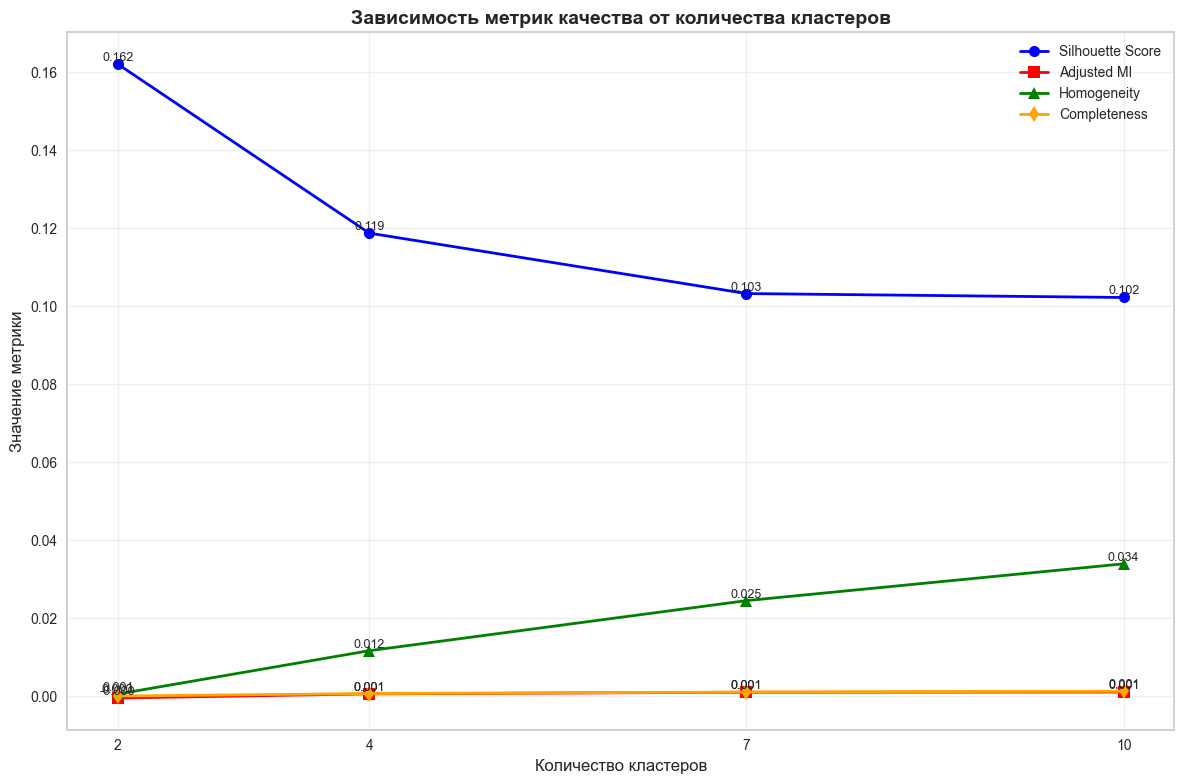

In [44]:
clusters = [2, 4, 7, 10]

silhouette_scores = [silhouette_med_2, silhouette_med_4, silhouette_med_7, silhouette_med_10]
ami_scores = [ami, ami_4, ami_7, ami_10]
homogeneity_scores = [homogeneity, homogeneity_4, homogeneity_7, homogeneity_10]
completeness_scores = [completeness, completeness_4, completeness_7, completeness_10]

plt.figure(figsize=(12, 8))

plt.plot(clusters, silhouette_scores, 'o-', linewidth=2, markersize=8, label='Silhouette Score', color='blue')
plt.plot(clusters, ami_scores, 's-', linewidth=2, markersize=8, label='Adjusted MI', color='red')
plt.plot(clusters, homogeneity_scores, '^-', linewidth=2, markersize=8, label='Homogeneity', color='green')
plt.plot(clusters, completeness_scores, 'd-', linewidth=2, markersize=8, label='Completeness', color='orange')

plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Значение метрики', fontsize=12)
plt.title('Зависимость метрик качества от количества кластеров', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(clusters)
plt.legend(loc='best', fontsize=10)

for i, k in enumerate(clusters):
    plt.text(k, silhouette_scores[i], f'{silhouette_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(k, ami_scores[i], f'{ami_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(k, homogeneity_scores[i], f'{homogeneity_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(k, completeness_scores[i], f'{completeness_scores[i]:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

По графику можно сделать вывод, что при 10 кластерах Silhouette очень низкий (0.102), что указывает на слабую структуру кластеров (они могут быть некомпактными или плохо разделимыми).
Это может быть связано с тем, что K-Means принудительно разбивает данные на 10 кластеров, хотя естественных групп может быть меньше.

**7** - Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить
полученные итоговые метрики с теми, что были получены на данных, нормализованных с помощью StandardScaler.

Выполняется нормализация данных для кластеризации двумя разными методами. Сначала создаются объекты MinMaxScaler (масштабирует значения в диапазон [0, 1]) и MaxAbsScaler (масштабирует значения в диапазон [-1, 1] по абсолютному максимуму). Затем каждый скалер применяется к исходным данным df_for_clustering методом fit_transform. Полученные массивы преобразуются обратно в DataFrame с сохранением оригинальных названий столбцов. В результате получаются два новых нормализованных набора данных scaled_minmax и scaled_maxabs для последующего сравнения с ранее использованным StandardScaler.

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
scaler_minmax = MinMaxScaler()
scaler_maxabs = MaxAbsScaler()
scaled_minmax = scaler_minmax.fit_transform(df_for_clustering)
scaled_maxabs = scaler_maxabs.fit_transform(df_for_clustering)
scaled_minmax = pd.DataFrame(scaled_minmax, columns=df_for_clustering.columns)
scaled_maxabs = pd.DataFrame(scaled_maxabs, columns=df_for_clustering.columns)

Выполним кластеризацию K-Means на данных, нормализованных с помощью MinMaxScaler и MaxAbsScaler, и вычислим четыре метрики качества для каждой кластеризации: силуэтный коэффициент (silhouette), скорректированную взаимную информацию (AMI), однородность (homogeneity) и полноту (completeness). Эти метрики позволяют оценить качество кластеризации как с точки зрения внутренней структуры данных (silhouette), так и соответствия истинным меткам классов (AMI, homogeneity, completeness). Полученные значения будут использоваться для сравнения с результатами, полученными ранее на данных, нормализованных через StandardScaler.

In [47]:
cluster_labels_minmax = kmeans.fit_predict(scaled_minmax)
cluster_labels_maxabs = kmeans.fit_predict(scaled_maxabs)

silhouette_minmax = silhouette_score(scaled_minmax, cluster_labels_minmax)
ami_minmax = adjusted_mutual_info_score(true_labels, cluster_labels_minmax)
homogeneity_minmax = homogeneity_score(true_labels, cluster_labels_minmax)
completeness_minmax = completeness_score(true_labels, cluster_labels_minmax)

silhouette_med_maxabs = silhouette_score(scaled_maxabs, cluster_labels_maxabs)
ami_maxabs = adjusted_mutual_info_score(true_labels, cluster_labels_maxabs)
homogeneity_maxabs = homogeneity_score(true_labels, cluster_labels_maxabs)
completeness_maxabs = completeness_score(true_labels, cluster_labels_maxabs)

In [49]:
print(f"Общий коэффициент силуэта: {silhouette_med_2}")
print(f"Скорректированная взаимная информация (AMI): {ami:.4f}")
print(f"Однородность (Homogeneity): {homogeneity:.4f}")
print(f"Полнота (Completeness): {completeness:.4f}")

print(f"Общий коэффициент силуэта minmax: {silhouette_minmax}")
print(f"Скорректированная взаимная информация (AMI) minmax: {ami_minmax:.4f}")
print(f"Однородность (Homogeneity) minmax: {homogeneity_minmax:.4f}")
print(f"Полнота (Completeness) minmax: {completeness_minmax:.4f}")

print(f"Общий коэффициент силуэта maxabs: {silhouette_med_maxabs}")
print(f"Скорректированная взаимная информация (AMI) maxabs: {ami_maxabs:.4f}")
print(f"Однородность (Homogeneity) maxabs: {homogeneity_maxabs:.4f}")
print(f"Полнота (Completeness) maxabs: {completeness_maxabs:.4f}")

Общий коэффициент силуэта: 0.16212334847015078
Скорректированная взаимная информация (AMI): -0.0004
Однородность (Homogeneity): 0.0006
Полнота (Completeness): 0.0001
Общий коэффициент силуэта minmax: 0.1756610796944351
Скорректированная взаимная информация (AMI) minmax: 0.0039
Однородность (Homogeneity) minmax: 0.0203
Полнота (Completeness) minmax: 0.0024
Общий коэффициент силуэта maxabs: 0.18494655060477885
Скорректированная взаимная информация (AMI) maxabs: -0.0004
Однородность (Homogeneity) maxabs: 0.0000
Полнота (Completeness) maxabs: 0.0000


Можно сделать вывод, что сравнение методов нормализации данных показывает, что MaxAbsScaler обеспечивает наилучшую внутреннюю структуру кластеров с самым высоким силуэтным коэффициентом 0.185, что указывает на более компактные и лучше разделенные группы. MinMaxScaler демонстрирует заметно лучшее соответствие между кластерами и истинными метками классов по всем внешним метрикам, хотя абсолютные значения остаются низкими. StandardScaler показывает средний результат по внутренней метрике и практически нулевые значения внешних метрик. Таким образом, выбор метода нормализации существенно влияет на результаты кластеризации: MaxAbsScaler лучше подходит для выделения геометрически четких групп, а MinMaxScaler — для задач, где важно приближение к известной классификации.

**8** - Построить матрицу непредвиденных обстоятельств contingency_matrix, дайте
описание данной матрицы и интерпретацию.

Матрица непредвиденных обстоятельств (contingency matrix), также называемая матрицей сопряженности, показывает совместное распределение объектов между истинными классами и предсказанными кластерами. Это таблица размером C×K, где C — количество истинных классов, а K — количество кластеров. Каждая ячейка [i, j] содержит количество объектов, которые принадлежат i-му истинному классу и были отнесены к j-му кластеру.

Для интерпретации конкретной матрицы (на основе результатов MinMaxScaler):

Значения на главной диагонали показывают, сколько объектов каждого класса правильно сгруппировались в соответствующие кластеры.

Значения вне диагонали показывают ошибки кластеризации — объекты, которые попали в "чужие" кластеры.

Если в строке есть несколько значимых значений (не только на диагонали), это означает, что соответствующий класс разделился между несколькими кластерами.

Если в столбце есть значения из разных строк, это означает, что кластер содержит смесь объектов из разных классов.

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
contingency_matrix = confusion_matrix(true_labels, cluster_labels_minmax)

<Figure size 1000x800 with 0 Axes>

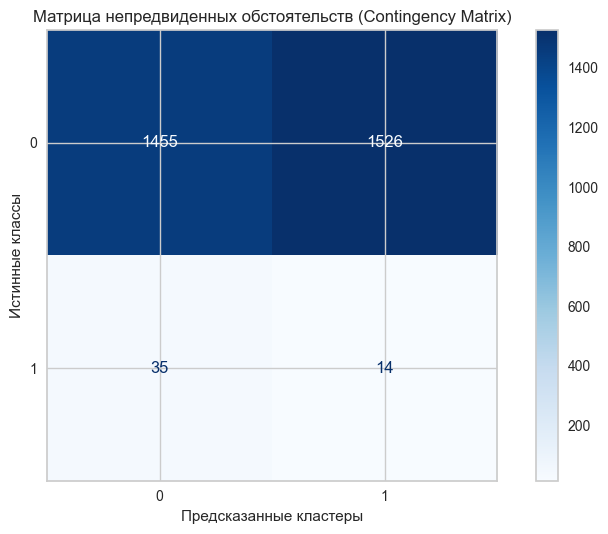

In [51]:
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=contingency_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица непредвиденных обстоятельств (Contingency Matrix)')
plt.xlabel('Предсказанные кластеры')
plt.ylabel('Истинные классы')
plt.tight_layout()
plt.show()

 По  метрикам AMI=0.0039, Homogeneity=0.0203, Completeness=0.0024, можно увидеть, что матрица  показывет слабую диагональную структуру с равномерным распределением значений по всем ячейкам, что подтверждает низкое соответствие между кластерами и истинными классами.

Можно сделать вывод, что матрица помогает понять, какие именно классы путаются между собой и как кластеры соотносятся с реальной структурой данных, что особенно важно для понимания природы ошибок кластеризации.